## PostClass (diabetes)
- Logistic Regression multicollinearity ile mücadele edebilir.
- y_pred_proba : Hazırladığınız rapora proba'ları eklerseniz ve buna göre sıralama yaparsanız müşteri onu hangi threshold'dan keseceğine karar verebilir. 
- Logistic Regression Hyperparametreleri:
    - penalty : Hem overfittin hem de multicollinearity'den kurtarır. l1, l2, elastic, None seçenekeri vardır. Default değeri l2'dirc
    - C : en uygun alpha değeridir. default değeri 1'dir. Burada C küçüldükçe optimizasyon artar. C için değer aralığı belirlerken linspace yerine logspace tercih edilir.
    - class_weight : balanced ya da None seçilebilir. default değeri None' dır.
    - solver : optimizasyon ile ilgilenir.'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' değerlerinden birini alır. Default değeri lbfgs'dir.
    

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [88]:
df=pd.read_csv("diabetes.csv")

In [89]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


##### DiabetesPedigreeFunction: diabetes history in relatives
##### BMI: Body mass index

In [90]:
df.shape

(768, 9)

## Exploratory Data Analysis and Visualization

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [93]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

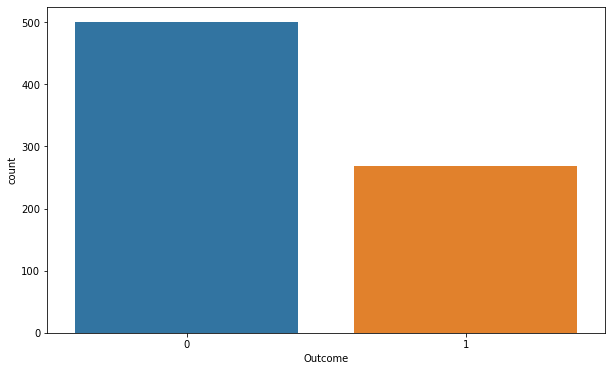

In [94]:
sns.countplot(df.Outcome)

<AxesSubplot:xlabel='Pregnancies'>

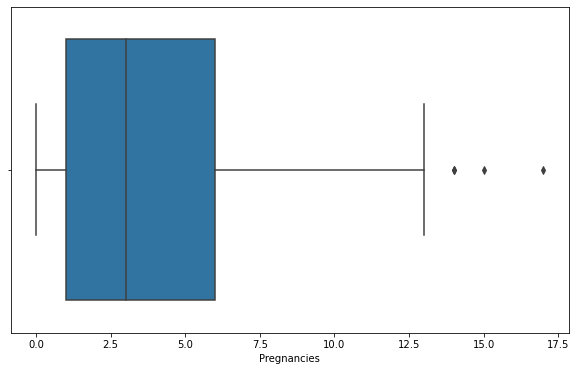

In [95]:
sns.boxplot(df.Pregnancies)

In [96]:
#df=df[df.Pregnancies<13]

<AxesSubplot:xlabel='Pregnancies'>

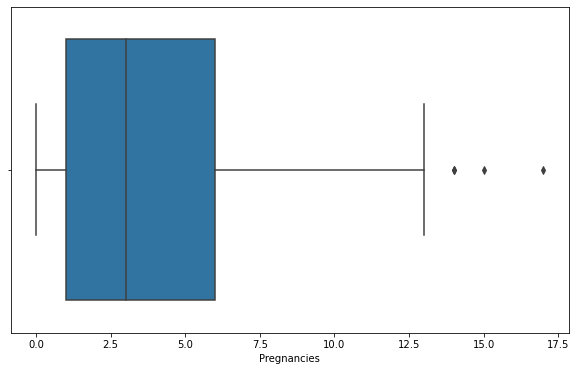

In [97]:
sns.boxplot(df.Pregnancies)

<AxesSubplot:xlabel='SkinThickness'>

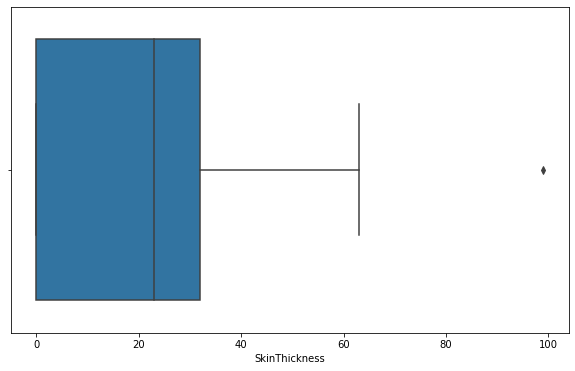

In [98]:
sns.boxplot(df.SkinThickness)

In [99]:
df=df[(df.SkinThickness<70) & (df.SkinThickness>0)]

<AxesSubplot:xlabel='SkinThickness'>

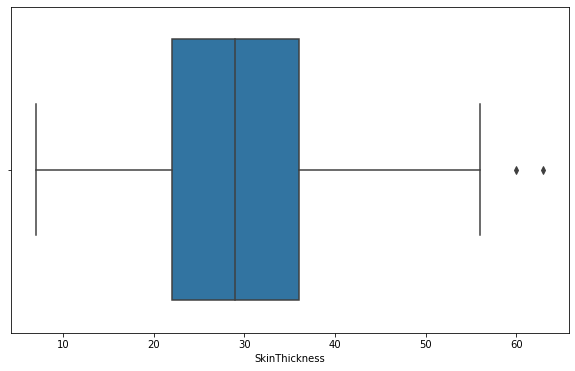

In [100]:
sns.boxplot(df.SkinThickness)

<AxesSubplot:xlabel='Insulin'>

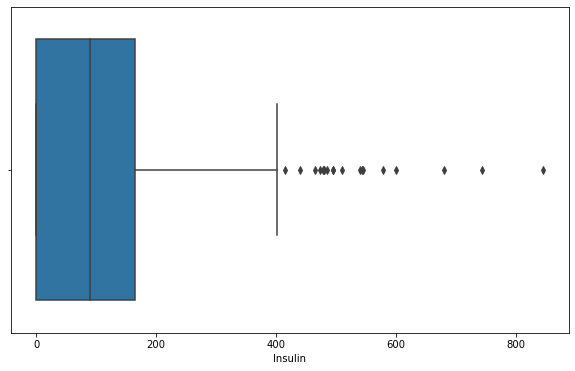

In [101]:
sns.boxplot(df.Insulin)

<AxesSubplot:xlabel='Glucose'>

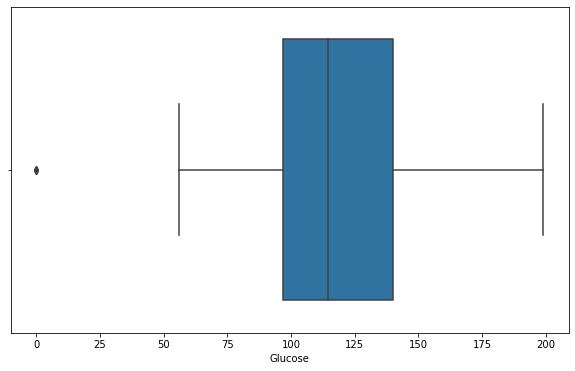

In [102]:
sns.boxplot(df.Glucose)

In [103]:
df=df[df.Glucose>0]

<AxesSubplot:xlabel='Glucose'>

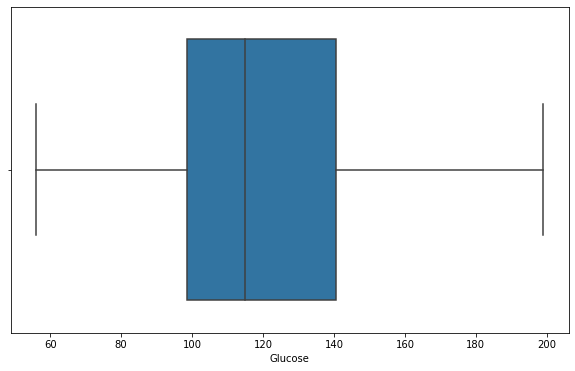

In [104]:
sns.boxplot(df.Glucose)

<AxesSubplot:xlabel='BloodPressure'>

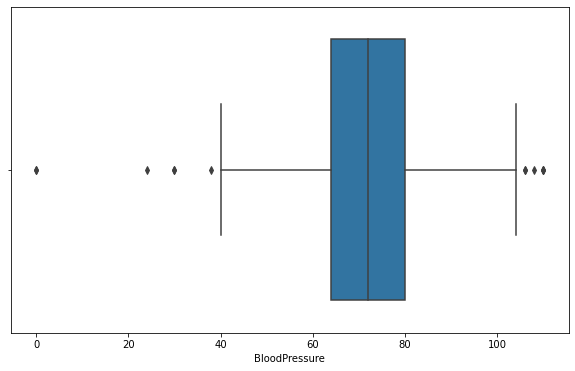

In [105]:
sns.boxplot(df.BloodPressure)

In [106]:
df=df[df.BloodPressure>35]

<AxesSubplot:xlabel='BloodPressure'>

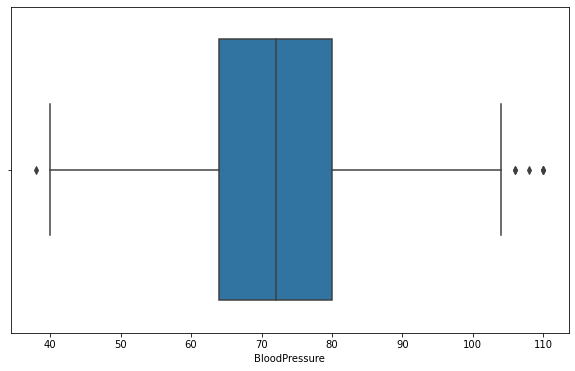

In [107]:
sns.boxplot(df.BloodPressure)

<AxesSubplot:xlabel='BMI'>

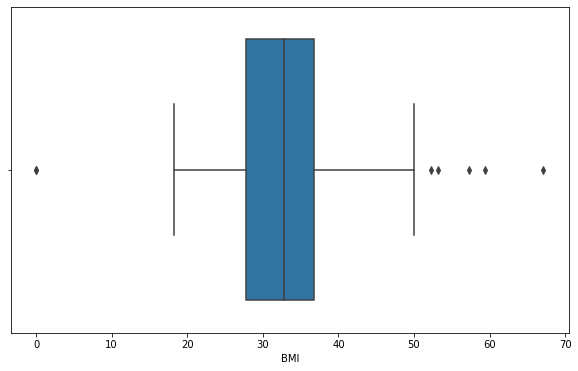

In [108]:
sns.boxplot(df.BMI)

In [109]:
df=df[df.BMI>0]

<AxesSubplot:xlabel='BMI'>

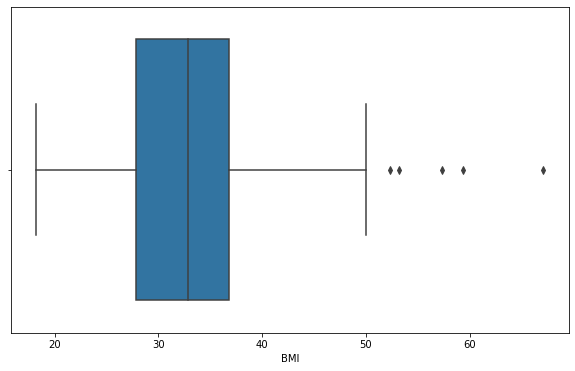

In [110]:
sns.boxplot(df.BMI)

In [111]:
df.shape

(528, 9)

In [112]:
df.Outcome.value_counts()

0    353
1    175
Name: Outcome, dtype: int64

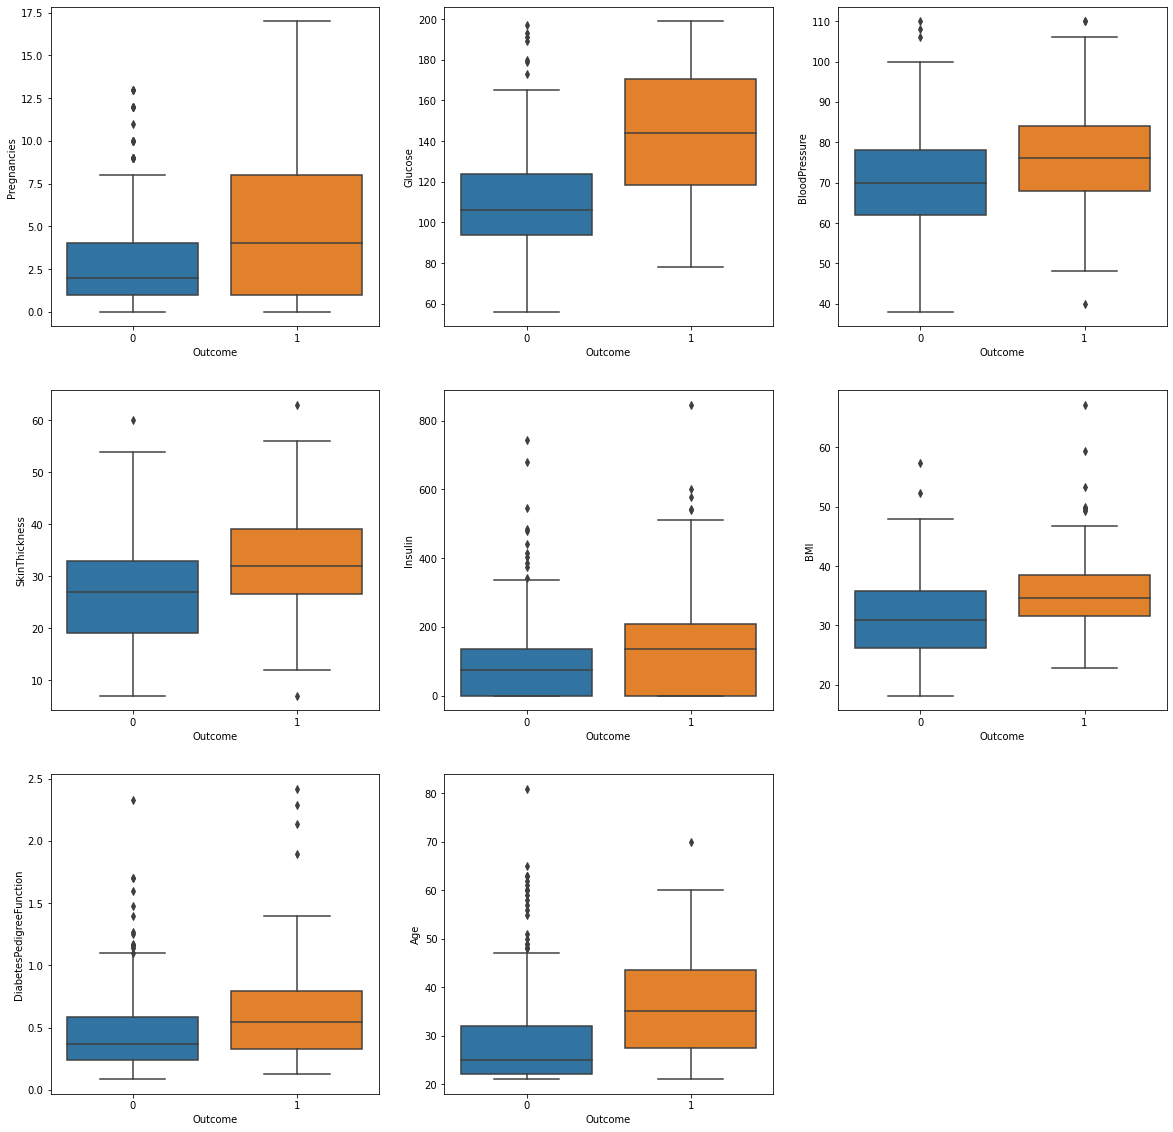

In [113]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

<AxesSubplot:>

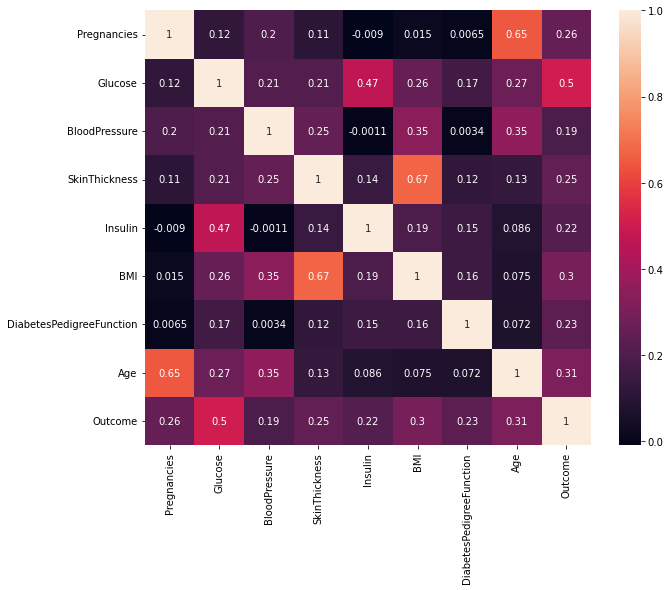

In [114]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

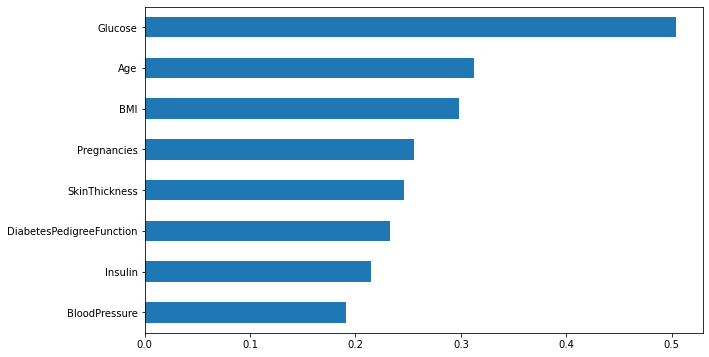

In [115]:
# df.corr()
# df.corr()["Outcome"].sort_values().plot.barh()
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()

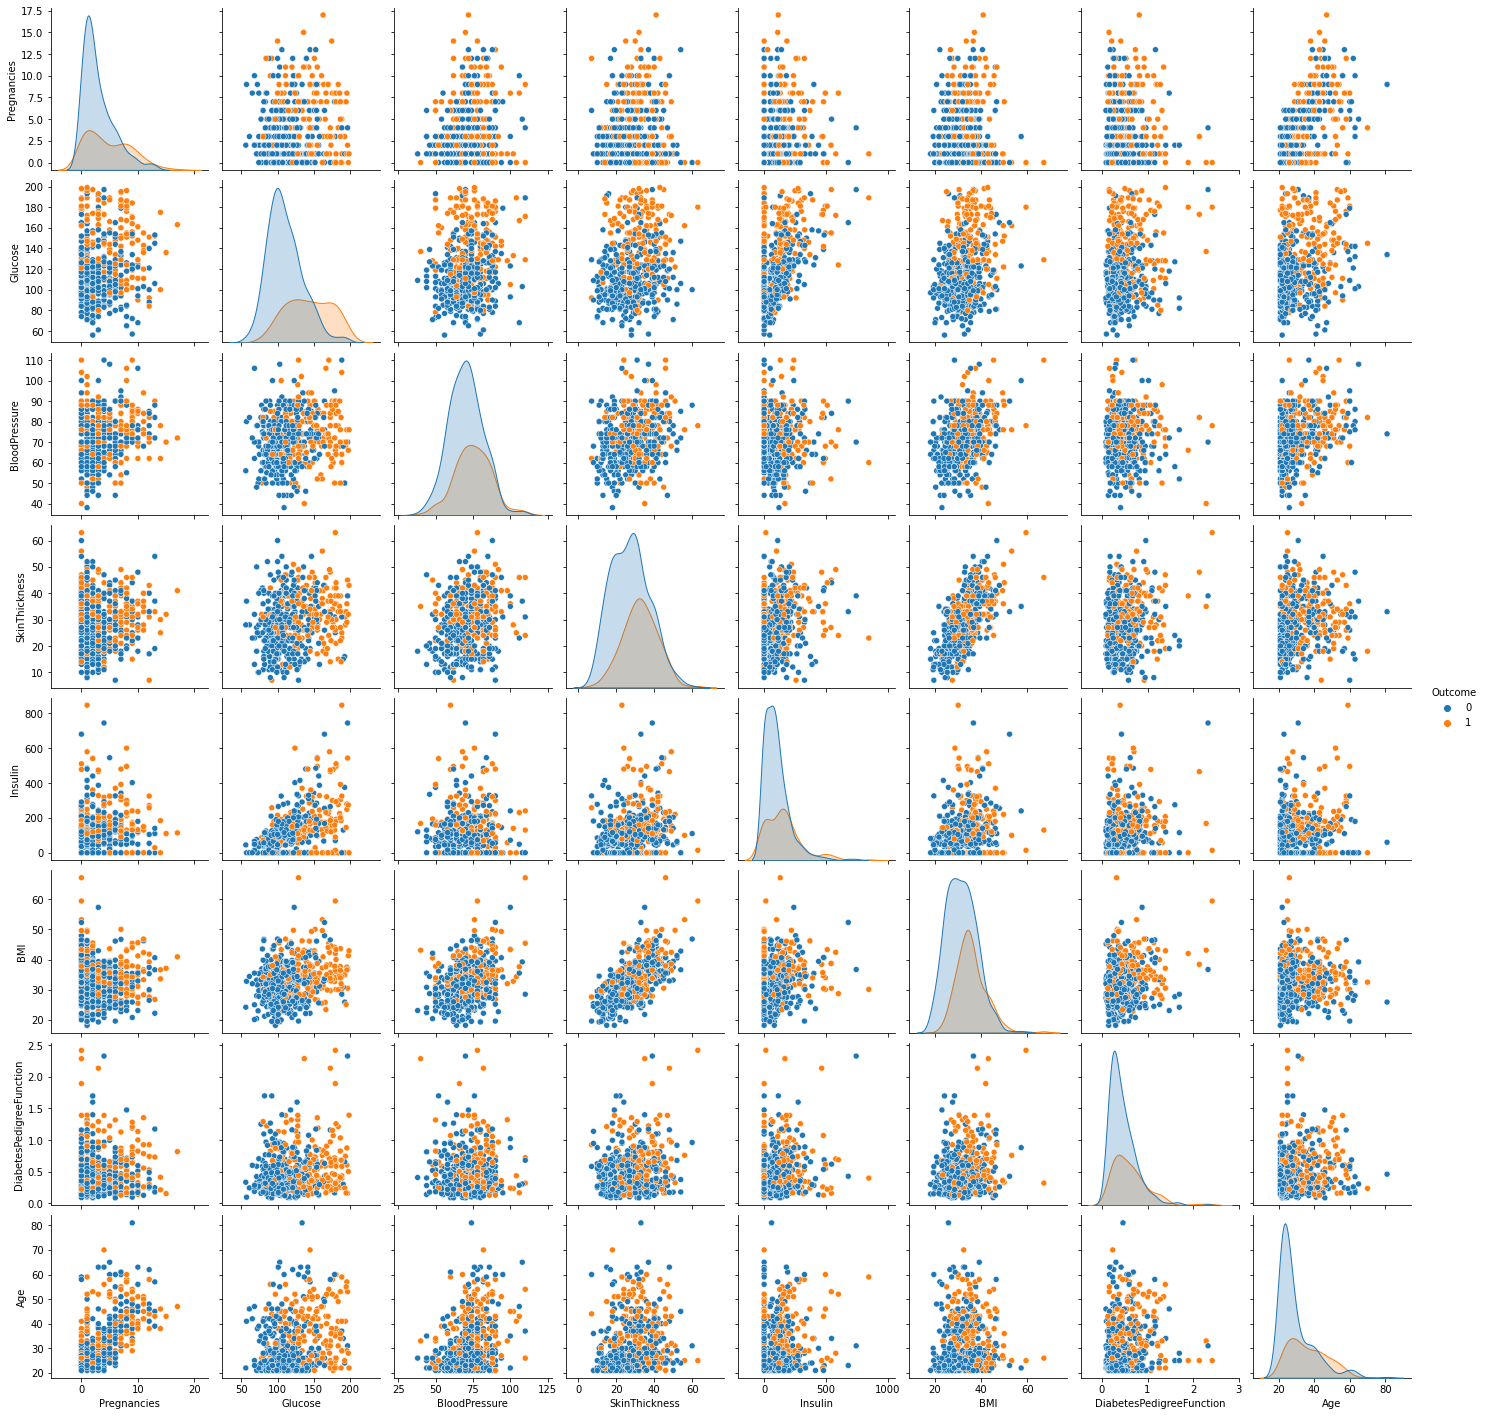

In [116]:
sns.pairplot(df, hue = "Outcome")

## Train | Test Split and Scaling

In [117]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42) # stratify is....

In [120]:
#scaler = StandardScaler()
scaler = RobustScaler()

In [121]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
log_model=LogisticRegression()

In [124]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [125]:
y_pred=log_model.predict(X_test_scaled)

In [126]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [127]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
556,1,97,70,40,0,38.100,0.218,30,0,0,0.127
291,0,107,62,30,74,36.600,0.757,25,1,0,0.193
463,5,88,78,30,0,27.600,0.258,37,0,0,0.091
256,3,111,56,39,0,30.100,0.557,30,0,0,0.219
348,3,99,62,19,74,21.800,0.279,26,0,0,0.048
428,0,135,94,46,145,40.600,0.284,26,0,0,0.333
213,0,140,65,26,130,42.600,0.431,24,1,0,0.377
89,1,107,68,19,0,26.500,0.165,24,0,0,0.058
253,0,86,68,32,0,35.800,0.238,25,0,0,0.060
161,7,102,74,40,105,37.200,0.204,45,0,0,0.299


## Model Performance on Classification Tasks

In [128]:
from sklearn.metrics import confusion_matrix, classification_report

In [129]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [130]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)
# Burada test ile train data score'ları karşılaştırabilirz.
# Ancak test verisi sadece 1  noktadan alındı cross_validation yapıp tekrar karşılaştıracaz.

Test_Set
[[64  7]
 [13 22]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        71
           1       0.76      0.63      0.69        35

    accuracy                           0.81       106
   macro avg       0.79      0.76      0.78       106
weighted avg       0.81      0.81      0.81       106


Train_Set
[[250  32]
 [ 61  79]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       282
           1       0.71      0.56      0.63       140

    accuracy                           0.78       422
   macro avg       0.76      0.73      0.74       422
weighted avg       0.77      0.78      0.77       422



## Cross Validate

In [131]:
from sklearn.model_selection import cross_validate

In [132]:
model = LogisticRegression()
# Burada cross validation öncesi her zaman modelimizi tazeliyoruz. 
# Cross-Validation' ın önceki model'den etkilenmesini istemeyiz.

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.004,0.002,0.727,0.571,0.640,0.791
2,0.002,0.001,0.545,0.429,0.480,0.698
3,0.002,0.002,0.500,0.429,0.462,0.667
4,0.001,0.002,0.800,0.571,0.667,0.810
5,0.002,0.002,0.533,0.571,0.552,0.690
6,0.002,0.001,0.643,0.643,0.643,0.762
7,0.002,0.002,0.818,0.643,0.720,0.833
8,0.002,0.001,0.700,0.500,0.583,0.762
9,0.002,0.001,0.800,0.571,0.667,0.810
10,0.002,0.002,0.800,0.571,0.667,0.810


In [133]:
df_scores.mean()[2:]
# Buradaki score'lar 1 içindir. 

test_precision   0.687
test_recall      0.550
test_f1          0.608
test_accuracy    0.763
dtype: float64

In [134]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Burada yukarıdaki test scoreları ile bu çıktıdaki train çıktılarını karşılaştırabiliriz.
# Ancak 1 için olan değerlere bakmalıyız çünkü 1 için cross_validation yaptık.

Test_Set
[[64  7]
 [13 22]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        71
           1       0.76      0.63      0.69        35

    accuracy                           0.81       106
   macro avg       0.79      0.76      0.78       106
weighted avg       0.81      0.81      0.81       106


Train_Set
[[250  32]
 [ 61  79]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       282
           1       0.71      0.56      0.63       140

    accuracy                           0.78       422
   macro avg       0.76      0.73      0.74       422
weighted avg       0.77      0.78      0.77       422



## Cross Validate for 0 class

In [173]:
# Şimdi ekstra olarak bir de 0 sınıfı için cross_validate yapacağız.

In [176]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [178]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Burada 0 için make_scorer import ettik.

In [181]:
f1_0 = make_scorer(f1_score, pos_label = 0)
precision_0 = make_scorer(precision_score, pos_label = 0)
recall_0 = make_scorer(recall_score, pos_label = 0)

In [185]:
model = LogisticRegression()
# Burada cross validation öncesi her zaman modelimizi tazeliyoruz. 
# Cross-Validation' ın önceki model'den etkilenmesini istemeyiz.

scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = {"precision_0" : precision_0, "recall_0" : recall_0, "f1_0" : f1_0},
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,test_recall_0,test_f1_0
1,0.003,0.002,0.812,0.897,0.852
2,0.002,0.002,0.750,0.828,0.787
3,0.002,0.002,0.733,0.786,0.759
4,0.003,0.001,0.812,0.929,0.867
5,0.002,0.001,0.778,0.750,0.764
6,0.003,0.002,0.821,0.821,0.821
7,0.002,0.002,0.839,0.929,0.881
8,0.003,0.002,0.781,0.893,0.833
9,0.002,0.002,0.812,0.929,0.867
10,0.002,0.001,0.812,0.929,0.867


In [192]:
df_scores.mean()[2:]
# Bu score'lar target =0 için olan score'lar.

test_precision_0   0.795
test_recall_0      0.869
test_f1_0          0.830
dtype: float64

In [193]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[64  7]
 [13 22]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        71
           1       0.76      0.63      0.69        35

    accuracy                           0.81       106
   macro avg       0.79      0.76      0.78       106
weighted avg       0.81      0.81      0.81       106


Train_Set
[[250  32]
 [ 61  79]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       282
           1       0.71      0.56      0.63       140

    accuracy                           0.78       422
   macro avg       0.76      0.73      0.74       422
weighted avg       0.77      0.78      0.77       422



## GridSearchCV

In [194]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [204]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2", "elasticnet"]  # penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'
C = np.logspace(-1, 5, 20)            # C değeri için linspace yerine logspace tercih edilir.   # C : float, default=1.0
class_weight = ["balanced", "None"]   # class_weight : dict or 'balanced', default=None
# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies 
# in the input data
solver = ["lbfgs", "liblinear", "sag", "saga", "newton-cg"]
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'},             default='lbfgs'

param_grid = {
                "penalty" : penalty,
                "C" : C,
                "class_weight" : class_weight,
                "solver" : solver
             }

grid_model = GridSearchCV(estimator = model, param_grid = param_grid, scoring = "recall", n_jobs = -1)
# Burada recall' ı önceleyerek optimal değerleri bulmasını istedik.
# Çünkü şeker hastası olan herkesi şeker hastası olarak teşhis etmek istiyoruz.
# Bu şekilde arada belki şeker hastası olmayanlara da şeker hastası diyeceğiz ancak diğer ihtimal daha zararlı.

In [205]:
grid_model.fit(X_train_scaled, y_train)

# burada data'nın büyüklüğün ve belirttiğiniz aralıklara göre süre fit süresi çok uzayabilir.

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', 'None'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                    'newton-cg']},
             scoring='recall')

In [206]:
grid_model.best_params_
# Buradaki best parametreleri kontrol etmekte fayda var.
# Mesela C için bizim aralığımız -1 ile 5 arasında log idi. Eğer best C = -1 veya 5 çıksaydı aralığı güncellemek gerekecekti..

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [207]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[58 13]
 [ 9 26]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        71
           1       0.67      0.74      0.70        35

    accuracy                           0.79       106
   macro avg       0.77      0.78      0.77       106
weighted avg       0.80      0.79      0.80       106


Train_Set
[[212  70]
 [ 29 111]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       282
           1       0.61      0.79      0.69       140

    accuracy                           0.77       422
   macro avg       0.75      0.77      0.75       422
weighted avg       0.79      0.77      0.77       422



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [208]:
from sklearn.metrics \
import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

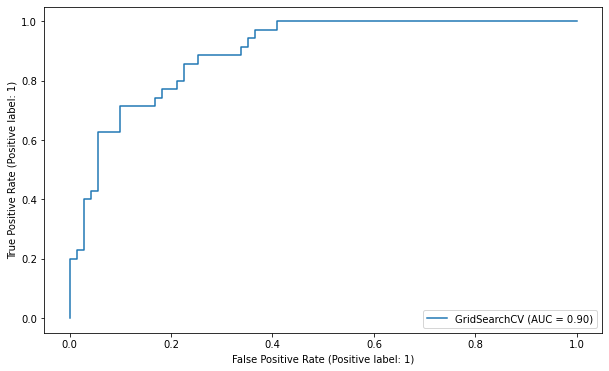

In [210]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

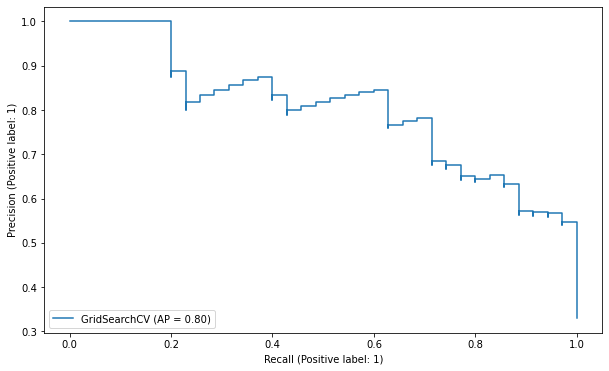

In [211]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold for max recall score

In [212]:
#Buraya kadar olasılık için threshold' un default değeri olan 0.5 ile geldik.
# Ancak en iyi score'u almak için bunu da optimize edebiliriz.

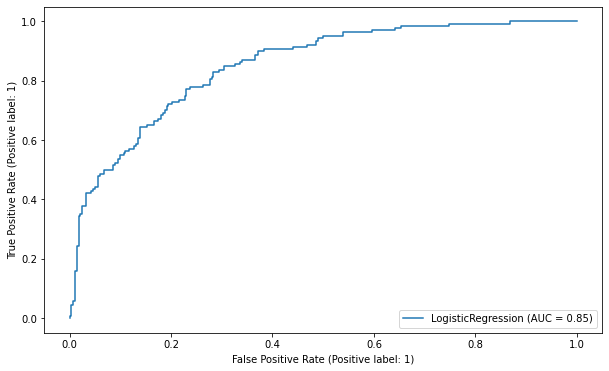

In [214]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [215]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

# Auc score'aa bu şekilde de bakabiliriz.
# Bu değer 1' e ne kadar yakın olursa bizim için o kadar iyi.

0.8514437689969605

In [221]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
# Burada curve üzerindeki tüm noktaları çektik. Bunlar içinden en yüksek skoru veren değerleri bulacağız.
# Yani bize tp_rate'in eb büyük ancak fp_rate' in en küçük olduğu yerdeki olasılık değeri lazım.
# Bu da ikisi arasındaki farkın en büyük olduğu noktayı bulmak demektir. Bunun için de np.argmax kullanacağız.

In [224]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold
# En yüksek recall score'u için en uygun olasılık değeri 0.262 çıktı.
# Yani bu olasılık skoru'nun üstündekileri şeker hastası olarak niteleyeceğiz.

0.2624879602989054

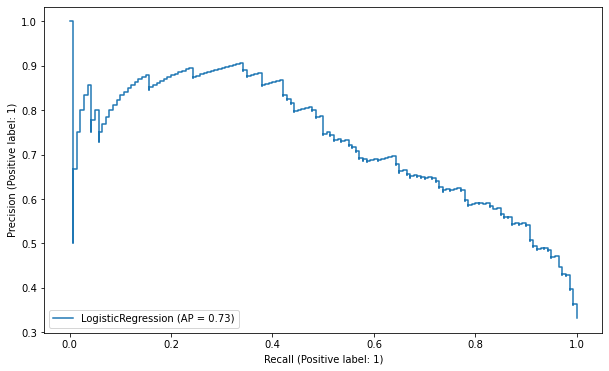

In [225]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [226]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:, 1])

0.7301110355218668

In [227]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [229]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold
# Bu da en iyi f1 score için threshold değeridir.

0.28646522197641466

In [230]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:, 1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
# Burada f1 score için prediction'ları optimal_threshold'a göre güncelledik.

In [231]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[34 37]
 [ 0 35]]
              precision    recall  f1-score   support

           0       1.00      0.48      0.65        71
           1       0.49      1.00      0.65        35

    accuracy                           0.65       106
   macro avg       0.74      0.74      0.65       106
weighted avg       0.83      0.65      0.65       106



In [232]:
y_train_pred2 = pd.Series(grid_model.predict_proba(X_train_scaled)[:, 1]).apply(lambda x: 1 if x >= optimal_threshold else 0)
print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[104 178]
 [  3 137]]
              precision    recall  f1-score   support

           0       0.97      0.37      0.53       282
           1       0.43      0.98      0.60       140

    accuracy                           0.57       422
   macro avg       0.70      0.67      0.57       422
weighted avg       0.79      0.57      0.56       422



## Final Model and Model Deployment

In [234]:
scaler = RobustScaler().fit(X)

In [235]:
import pickle
pickle.dump(scaler, open("scaler_diabetes", "wb"))

In [236]:
X_scaled = scaler.transform(X)

In [237]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [238]:
final_model = LogisticRegression(C=0.1, class_weight="balanced", penalty = "l1", solver = "liblinear").fit(X_scaled, y)

In [240]:
pickle.dump(final_model, open("final_model_diabetes", "wb"))

In [243]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,528.000,3.534,3.318,0.000,1.000,2.000,5.000,17.000
Glucose,528.000,121.044,30.865,56.000,99.000,115.500,141.250,199.000
BloodPressure,528.000,71.756,11.908,38.000,64.000,72.000,80.000,110.000
SkinThickness,528.000,29.028,10.083,7.000,22.000,29.000,36.000,63.000
Insulin,528.000,115.468,123.299,0.000,0.000,92.000,166.250,846.000
BMI,528.000,32.835,6.820,18.200,27.875,32.800,36.825,67.100
DiabetesPedigreeFunction,528.000,0.503,0.346,0.085,0.259,0.415,0.660,2.420
Age,528.000,31.585,10.708,21.000,23.000,28.000,38.000,81.000


# Using the Model

In [244]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [245]:
my_dict = {
                "Pregnancies" : [3, 6, 5],
                "Glucose" : [117, 140, 120],
                "BloodPressure" : [72, 80, 75],
                "SkinThickness" : [23, 33, 25],
                "Insulin" : [48, 132, 55],
                "BMI" : [32, 36.5, 34],
                "DiabetesPedigreeFunction" : [0.38, 0.63, 0.45],
                "Age" : [29, 40, 33]
          }

# Burada modele tahmin etmesi için veriler oluşturduk.
# Bu veriler modelin sütun sırasına uygun bir şekilde verilmelidir.
# Ayrıca biz bu değerleri hazırlarken modelin describe'ına bakaram min- max aralığındaki değerlerden girdik.

In [246]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,117,72,23,48,32.000,0.380,29
1,6,140,80,33,132,36.500,0.630,40
2,5,120,75,25,55,34.000,0.450,33


In [248]:
scaler_diabetes = pickle.load(open("scaler_diabates", "rb"))
#burada daha önce kaydettiğimiz scaler'ı çaığırdık

In [250]:
sample_scaled = scaler_diabates.transform(sample)
sample_scaled
# Modele scaling yaptığımız için ona vereğimiz sample'ı da scale ediyrouz.

array([[-0.16109847, -0.13113136,  0.02053624, -0.59845598, -0.54770842,
        -0.12252133, -0.35728774, -0.24165911],
       [ 0.74379504,  0.61475119,  0.69297873,  0.39427024,  0.13420955,
         0.53789309,  0.36688856,  0.78658713],
       [ 0.44216387, -0.03384233,  0.27270217, -0.39991073, -0.49088192,
         0.17099619, -0.15451837,  0.13224861]])

In [251]:
final_model = pickle.load(open("final_model_diabates", "rb"))
# Burada daha önce kaydettiğimiz  modelimizi çağırdık.

In [255]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1if i >= optimal_threshold else 0 for i in predictions_proba[:, 1]]

In [257]:
sample["pred_proba"] = predictions_proba[:, 1]
sample["pred_0.50"] = predictions
sample["pred_0.28"] = predictions2
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.28
0,3,117,72,23,48,32.000,0.380,29,0.364,0,1
1,6,140,80,33,132,36.500,0.630,40,0.767,1,1
2,5,120,75,25,55,34.000,0.450,33,0.498,0,1


In [259]:
#Burada optimal_threshold ile  recall'ı yüksek sonuçlar aldık.
# pred_0.50 ve pred_028 karşılaştırabilirsiniz.